In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model

**Задание 2.**


---


 Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк.

 Читаем данные с .csv с помощью pandas

In [ ]:
X = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/17_x.csv', names=['x1','x2','x3','x4','x5','x6','x7'])
Y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/17_y.csv',  names=['y'])

Проверяем переименовались ли столбцы

In [ ]:
X

,x1,x2,x3,x4,x5,x6,x7
0,-1.361925,0.626942,1.296418,0.159414,0.214373,-1.133045,1.932950
1,-0.063697,0.741201,-1.147903,-0.139082,-0.471392,-0.189430,-1.554224
2,0.506897,-0.953144,1.516436,-0.880286,-1.317985,1.399281,0.663641
3,-0.488549,0.203005,1.741708,0.930606,-2.411736,0.482606,-1.103487
4,0.132410,0.571993,-0.154500,2.296943,-0.560369,-0.391521,1.745766
...,...,...,...,...,...,...,...
283,-0.725322,-0.357324,0.863710,-0.322913,-1.274621,0.856446,-0.149595
284,-0.292017,0.108973,-0.419605,0.575354,0.144567,0.655843,2.096669
285,-1.087615,1.217706,0.698624,-0.059392,0.052883,-2.548074,-0.214123
286,-1.061666,1.438184,-0.038938,-0.704457,0.373280,1.900606,0.246362


In [ ]:
Y

,y
0,-18.039039
1,-31.599308
2,-14.044437
3,65.216886
4,169.639517
...,...
283,-58.437132
284,-12.996557
285,-22.661088
286,-70.500816


**Задание 3.**


---


 Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.

In [ ]:
# Количество точек данных X
X.shape

(288, 7)

In [ ]:
# Статистика по X
X.describe()

,x1,x2,x3,x4,x5,x6,x7
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,-0.022215,0.058786,0.004756,0.072112,-0.082758,0.018736,-0.017210
std,1.042067,0.928761,1.023841,1.011381,0.980429,0.989958,1.000718
min,-2.995465,-2.348600,-2.559418,-2.855582,-3.560949,-2.548074,-2.519880
25%,-0.736631,-0.577700,-0.725343,-0.619260,-0.733627,-0.676742,-0.715841
50%,-0.018954,-0.029057,-0.016260,0.078540,0.006632,-0.002273,-0.106052
75%,0.658540,0.703024,0.702230,0.694714,0.544160,0.701654,0.730286
max,3.056743,2.846660,2.810431,3.538405,2.566453,3.182432,2.431993


In [ ]:
# Количество точек данных Y
Y.shape

(288, 1)

In [ ]:
# Статистика по Y
Y.describe()

,y
count,288.000000
mean,4.751921
std,122.447676
min,-330.635696
25%,-87.981006
50%,4.239885
75%,81.094654
max,365.048225


**Задание 4.**


---


 Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.

Разделяет данные на рандомные train(обучабщие) и test(тестовые) сабсеты.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# test size - парамаетр который определяет размер тестового сабсета
# train_test_split - берет значения из датасетов X и Y

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

Проверяем корректность размеров обучающего и тестового сабсетов

In [ ]:
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of input - training set (230, 7)
shape of output - training set (230, 1)
shape of input - testing set (58, 7)
shape of output - testing set (58, 1)


Вывод: Разделение на сабсеты прошло верно в соотношении 80 к 20 

**Задание 5.**


---


 Для целевой и каждого из признаков постройте парную регрессионную модель. 

Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

***Примечание для себя:***

Признаки - X1, X2, X3...


---


Целевая переменная - Y

Для построения парной регрессионной модели нам понадобится LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
def r_2_score(column_name : str) -> None:
    
    #Модель линейной регрессии
    y = LinearRegression().fit(x_train[[column_name]].values, y_train.values)
    #Прогнозируем значения
    y_res = y.predict(x_test[[column_name]].values)
    
    #Строим точки значений на графике 
    plt.scatter(x_test[[column_name]].values, y_test.values, color='b')
    #Строим линию регрессии
    plt.plot(x_test[[column_name]].values, y_res, color='r', linewidth=2)
    #Высчитываем показатель R2
    r_2 = y.score(x_test[[column_name]].values,  y_test.values)
    
    ##!! Чем ближе R^2 к 1, тем сильнее связь и модель адекватнее
    print(f"R^2 score: {r_2}")

R^2 score: 0.4587485620721776


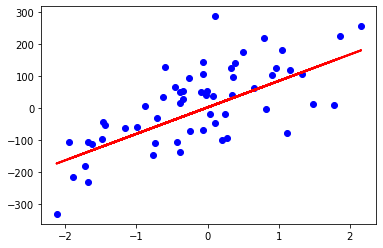

In [ ]:
r_2_score("x1")

R^2 score: 0.11294689685609616


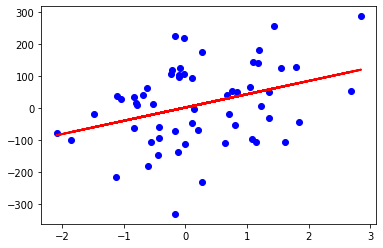

In [ ]:
r_2_score("x2")

R^2 score: 0.11307334923819412


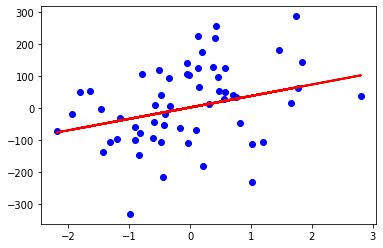

In [ ]:
r_2_score("x3")

R^2 score: 0.3178436424866037


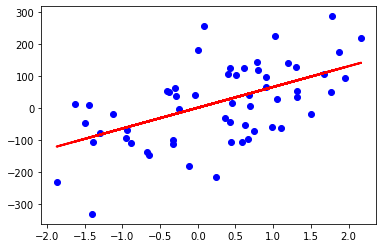

In [ ]:
r_2_score("x4")

R^2 score: 0.005253168609994918


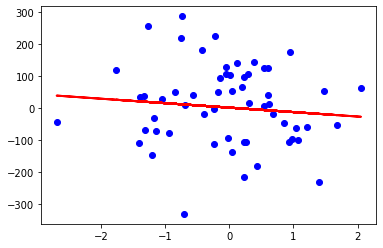

In [ ]:
r_2_score("x5")

R^2 score: -0.011826043845638345


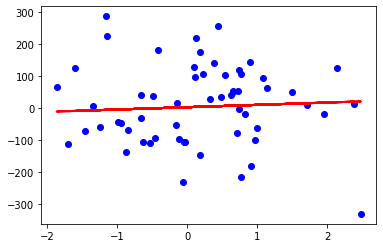

In [ ]:
r_2_score("x6")

R^2 score: 0.012161709605981508


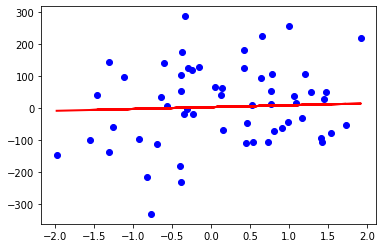

In [ ]:
r_2_score("x7")

**Вывод:** У признаков Х1 (R^2 = 0.5650790686471812 ) и Х4 (R^2 = 0.
2548982046406003 ), хотя бы есть связь

Остальные признаки по R^2 score меньше нуля что показывает что модель не адекватна

**Задание 6.**


---


 Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

Создаем регрессионную модель с помощью функции **OLS().** Затем мы передаем независимые и зависимые переменные в эту функцию и подгоняем эту модель с помощью функции **fit()**.

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
data = pd.DataFrame(np.array(x_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]), 
                            columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'])
data['y'] = np.array(y_train)
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]

model = sm.ols(formula='y~x1+x2+x3+x4+x5+x6+x7', data=data)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     4608.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):          1.82e-236
Time:                        08:58:35   Log-Likelihood:                -857.52
No. Observations:                 230   AIC:                             1731.
Df Residuals:                     222   BIC:                             1759.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4262      0.680     -0.626      0.532      -1.767       0.915
x1            86.8449      0.654    132.783      0.000      85.556      88.134
x2            39.8516      0.761     52.337      0.000      38.351      41.352
x3            34.7956      0.666     52.256      0.000      33.483      36.108
x4            64.5525      0.677     95.326      0.000      63.218      65.887
x5             0.3353      0.689      0.486      0.627      -1.023       1.694
x6            -0.5787      0.697     -0.830      0.407      -1.952       0.795
x7            -1.6412      0.675     -2.431      0.016      -2.972      -0.311
==============================================================================
Omnibus:                        2.727   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                2.676
Skew:                          -0.211   Prob(JB):                        0.262
Kurtosis:                       2.683   Cond. No.                         1.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
new_model = linear_model.LinearRegression()
new_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
import seaborn

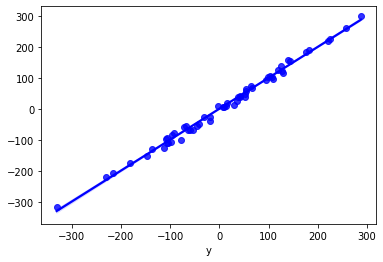

In [ ]:
seaborn.regplot(x=y_test, y=new_model.predict(x_test), color="b")

**Вывод**: как мы можем увидеть R-squared(коэффициент детерминации) равняется	0.994, что показывает модель правдоподобна и имеет место быть

Дополнительные задания


---



1. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии. PolymonFeatures()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

R^2 of model 0.4439048458575965
R^2 of model 0.07885475414957
R^2 of model 0.10515304997519537
R^2 of model 0.31984135513463574
R^2 of model -0.033617062915197504
R^2 of model -0.0037937376225807284
R^2 of model 0.01267720435798525


[[76.74466773216353, 7283.080578876195],
 [97.85399538576364, 13290.39691458687],
 [93.70902338463279, 13451.165700032183],
 [84.00546666608697, 10514.294349329039],
 [102.6604963802658, 14361.629828160489],
 [99.32000095138274, 14765.761950634636],
 [99.68211872285777, 14796.692782708978]]

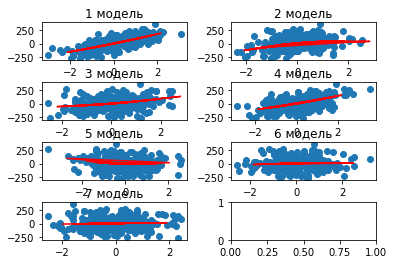

In [ ]:
# регрессия 2 порядка 
collect_data = []
metrics=[]
def polynom(column_name : str) -> None:
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(x_train[[column_name]])
    poly_features_test = poly.fit_transform(x_test[[column_name]])
    model = linear_model.LinearRegression()
    model.fit(poly_features, y_train)
    print("R^2 of model", model.score(poly_features_test,y_test))
    collect_data.append([model.score(poly_features_test,y_test), model.score(poly_features,y_train)])
    metrics.append([mean_absolute_error(y_test, model.predict(poly_features_test)), mean_squared_error(y_train, model.predict(poly_features))])
    return model.predict(poly_features_test)

fig, ax = plt.subplots(4,2)
plt.subplots_adjust(wspace=0.3, hspace=0.6)
ax[0,0].set_title('1 модель')
ax[0,1].set_title('2 модель')
ax[1,0].set_title('3 модель')
ax[1,1].set_title('4 модель')
ax[2,0].set_title('5 модель')
ax[2,1].set_title('6 модель')
ax[3,0].set_title('7 модель')


ax[0,0].plot(x_test["x1"], polynom("x1"), color='red')
ax[0,0].scatter(x_train["x1"], y_train)

ax[0,1].plot(x_test["x2"], polynom("x2"), color='red')
ax[0,1].scatter(x_train["x2"], y_train)

ax[1,0].plot(x_test["x3"], polynom("x3"), color='red')
ax[1,0].scatter(x_train["x3"], y_train)

ax[1,1].plot(x_test["x4"], polynom("x4"), color='red')
ax[1,1].scatter(x_train["x4"], y_train)

ax[2,0].plot(x_test["x5"], polynom("x5"), color='red')
ax[2,0].scatter(x_train["x5"], y_train)

ax[2,1].plot(x_test["x6"], polynom("x6"), color='red')
ax[2,1].scatter(x_train["x6"], y_train)

ax[3,0].plot(x_test["x7"], polynom("x7"), color='red')
ax[3,0].scatter(x_train["x7"], y_train)
metrics

R^2 of model 0.4439048458575965
R^2 of model 0.07885475414957
R^2 of model 0.10515304997519537
R^2 of model 0.31984135513463574
R^2 of model -0.033617062915197504
R^2 of model -0.0037937376225807284
R^2 of model 0.01267720435798525


[[76.74466773216353, 7283.080578876195],
 [97.85399538576364, 13290.39691458687],
 [93.70902338463279, 13451.165700032183],
 [84.00546666608697, 10514.294349329039],
 [102.6604963802658, 14361.629828160489],
 [99.32000095138274, 14765.761950634636],
 [99.68211872285777, 14796.692782708978],
 [76.74466773216353, 7283.080578876195],
 [97.85399538576364, 13290.39691458687],
 [93.70902338463279, 13451.165700032183],
 [84.00546666608697, 10514.294349329039],
 [102.6604963802658, 14361.629828160489],
 [99.32000095138274, 14765.761950634636],
 [99.68211872285777, 14796.692782708978]]

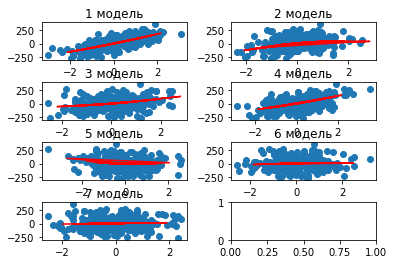

In [ ]:
def polynom3(column_name : str) -> None:
    poly = PolynomialFeatures(degree=3, include_bias=False)
    poly_features = poly.fit_transform(x_train[[column_name]])
    poly_features_test = poly.fit_transform(x_test[[column_name]])
    model = linear_model.LinearRegression()
    model.fit(poly_features, y_train)
    print("R^2 of model", model.score(poly_features_test,y_test))
    collect_data.append([model.score(poly_features_test,y_test), model.score(poly_features,y_train)])
    metrics.append([mean_absolute_error(y_test, model.predict(poly_features_test)), mean_squared_error(y_train, model.predict(poly_features))])
    return model.predict(poly_features_test)

fig, ax = plt.subplots(4,2)
plt.subplots_adjust(wspace=0.3, hspace=0.6)
ax[0,0].set_title('1 модель')
ax[0,1].set_title('2 модель')
ax[1,0].set_title('3 модель')
ax[1,1].set_title('4 модель')
ax[2,0].set_title('5 модель')
ax[2,1].set_title('6 модель')
ax[3,0].set_title('7 модель')


ax[0,0].plot(x_test["x1"], polynom("x1"), color='red')
ax[0,0].scatter(x_train["x1"], y_train)

ax[0,1].plot(x_test["x2"], polynom("x2"), color='red')
ax[0,1].scatter(x_train["x2"], y_train)

ax[1,0].plot(x_test["x3"], polynom("x3"), color='red')
ax[1,0].scatter(x_train["x3"], y_train)

ax[1,1].plot(x_test["x4"], polynom("x4"), color='red')
ax[1,1].scatter(x_train["x4"], y_train)

ax[2,0].plot(x_test["x5"], polynom("x5"), color='red')
ax[2,0].scatter(x_train["x5"], y_train)

ax[2,1].plot(x_test["x6"], polynom("x6"), color='red')
ax[2,1].scatter(x_train["x6"], y_train)

ax[3,0].plot(x_test["x7"], polynom("x7"), color='red')
ax[3,0].scatter(x_train["x7"], y_train)
metrics

R^2 of model 0.4439048458575965
R^2 of model 0.07885475414957
R^2 of model 0.10515304997519537
R^2 of model 0.31984135513463574
R^2 of model -0.033617062915197504
R^2 of model -0.0037937376225807284
R^2 of model 0.01267720435798525


[[76.74466773216353, 7283.080578876195],
 [97.85399538576364, 13290.39691458687],
 [93.70902338463279, 13451.165700032183],
 [84.00546666608697, 10514.294349329039],
 [102.6604963802658, 14361.629828160489],
 [99.32000095138274, 14765.761950634636],
 [99.68211872285777, 14796.692782708978],
 [76.74466773216353, 7283.080578876195],
 [97.85399538576364, 13290.39691458687],
 [93.70902338463279, 13451.165700032183],
 [84.00546666608697, 10514.294349329039],
 [102.6604963802658, 14361.629828160489],
 [99.32000095138274, 14765.761950634636],
 [99.68211872285777, 14796.692782708978],
 [76.74466773216353, 7283.080578876195],
 [97.85399538576364, 13290.39691458687],
 [93.70902338463279, 13451.165700032183],
 [84.00546666608697, 10514.294349329039],
 [102.6604963802658, 14361.629828160489],
 [99.32000095138274, 14765.761950634636],
 [99.68211872285777, 14796.692782708978]]

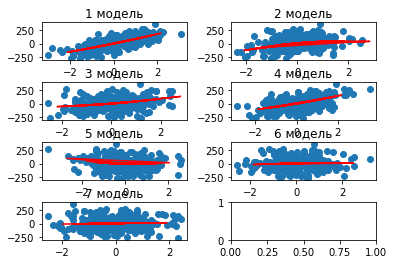

In [ ]:
def polynom10(column_name : str) -> None:
    poly = PolynomialFeatures(degree=10, include_bias=False)
    poly_features = poly.fit_transform(x_train[[column_name]])
    poly_features_test = poly.fit_transform(x_test[[column_name]])
    model = linear_model.LinearRegression()
    model.fit(poly_features, y_train)
    print("R^2 of model", model.score(poly_features_test,y_test))
    collect_data.append([model.score(poly_features_test,y_test), model.score(poly_features,y_train)])
    metrics.append([mean_absolute_error(y_test, model.predict(poly_features_test)), mean_squared_error(y_train, model.predict(poly_features))])
    return model.predict(poly_features_test)

fig, ax = plt.subplots(4,2)
plt.subplots_adjust(wspace=0.3, hspace=0.6)
ax[0,0].set_title('1 модель')
ax[0,1].set_title('2 модель')
ax[1,0].set_title('3 модель')
ax[1,1].set_title('4 модель')
ax[2,0].set_title('5 модель')
ax[2,1].set_title('6 модель')
ax[3,0].set_title('7 модель')


ax[0,0].plot(x_test["x1"], polynom("x1"), color='red')
ax[0,0].scatter(x_train["x1"], y_train)

ax[0,1].plot(x_test["x2"], polynom("x2"), color='red')
ax[0,1].scatter(x_train["x2"], y_train)

ax[1,0].plot(x_test["x3"], polynom("x3"), color='red')
ax[1,0].scatter(x_train["x3"], y_train)

ax[1,1].plot(x_test["x4"], polynom("x4"), color='red')
ax[1,1].scatter(x_train["x4"], y_train)

ax[2,0].plot(x_test["x5"], polynom("x5"), color='red')
ax[2,0].scatter(x_train["x5"], y_train)

ax[2,1].plot(x_test["x6"], polynom("x6"), color='red')
ax[2,1].scatter(x_train["x6"], y_train)

ax[3,0].plot(x_test["x7"], polynom("x7"), color='red')
ax[3,0].scatter(x_train["x7"], y_train)
metrics

2. Постройте сводную таблицу показателей точности всех построенных моделей по тестовой и обучающей выборке. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [ ]:
names = ['1_polynom2', '2_polynom2', '3_polynom2', '4_polynom2', '5_polynom2', '6_polynom2','7_polynom2', '1_polynom3', '2_polynom3', '3_polynom3', '4_polynom3', '5_polynom3', '6_polynom3','7_polynom3', '1_polynom10', '2_polynom10', '3_polynom10', '4_polynom10', '5_polynom10', '6_polynom10', '7_polynom10',]

In [ ]:
my_table1 = dict(zip(names, collect_data))
my_table2 = dict(zip(names, metrics))

In [ ]:
et_df = pd.DataFrame(my_table1, index = ['score_test','score_train'])
mt_df = pd.DataFrame(my_table2, index=['MAE', 'MSE'])

In [ ]:
et_df

,1_polynom2,2_polynom2,3_polynom2,4_polynom2,5_polynom2,6_polynom2,7_polynom2,1_polynom3,2_polynom3,3_polynom3,...,5_polynom3,6_polynom3,7_polynom3,1_polynom10,2_polynom10,3_polynom10,4_polynom10,5_polynom10,6_polynom10,7_polynom10
score_test,0.443905,0.078855,0.105153,0.319841,-0.033617,-0.003794,0.012677,0.443905,0.078855,0.105153,...,-0.033617,-0.003794,0.012677,0.443905,0.078855,0.105153,0.319841,-0.033617,-0.003794,0.012677
score_train,0.508944,0.103905,0.093065,0.291081,0.031678,0.004429,0.002344,0.508944,0.103905,0.093065,...,0.031678,0.004429,0.002344,0.508944,0.103905,0.093065,0.291081,0.031678,0.004429,0.002344


In [ ]:
mt_df

,1_polynom2,2_polynom2,3_polynom2,4_polynom2,5_polynom2,6_polynom2,7_polynom2,1_polynom3,2_polynom3,3_polynom3,...,5_polynom3,6_polynom3,7_polynom3,1_polynom10,2_polynom10,3_polynom10,4_polynom10,5_polynom10,6_polynom10,7_polynom10
MAE,76.744668,97.853995,93.709023,84.005467,102.660496,99.320001,99.682119,76.744668,97.853995,93.709023,...,102.660496,99.320001,99.682119,76.744668,97.853995,93.709023,84.005467,102.660496,99.320001,99.682119
MSE,7283.080579,13290.396915,13451.165700,10514.294349,14361.629828,14765.761951,14796.692783,7283.080579,13290.396915,13451.165700,...,14361.629828,14765.761951,14796.692783,7283.080579,13290.396915,13451.165700,10514.294349,14361.629828,14765.761951,14796.692783


In [ ]:
writer = pd.ExcelWriter('output.xlsx')
mt_df.to_excel(writer, 'marks')
writer.save()

###Вывод
---
Модель под номером 1 - **недоообучена** (Выдает около 76,7446677321635	по MAE)

Модель под номером 5 - **переобучена** (Выдает около 102.660496	по MAE)
